# Healthcare Capstone Project
### Jae

Jae's part for this group project is to clean up these columns:
id, patien_nbr, admission_type_id, discharge_disposition, admisiion_sourceid, time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatients, Number_emergency, number_inpatient, number_diagnoses 


In [1]:
import numpy as np
import pandas as pd
import os



# Jupyter notebook - i.e., how it truncates the columns
# or rows
pd.set_option('display.max_columns', 55)

In [2]:
%pwd

'C:\\Users\\jaeko'

## Data check

In [3]:
diabdata = pd.read_csv('C:\\Users\\jaeko/dataset_diabetes/diabetic_data.csv')
idmapping = pd.read_csv('C:\\Users\\jaeko/dataset_diabetes/IDs_mapping.csv')

In [4]:
diabdata.shape

(101766, 50)

In [5]:
idmapping.shape

(67, 2)

In [6]:
idmapping

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [7]:
diabdata.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
my_columns = '''encounter_id, patient_nbr, admission_type_id, 
discharge_disposition_id, admission_source_id, time_in_hospital, 
num_lab_procedures, num_procedures, num_medications, number_outpatient, 
number_emergency, number_inpatient, number_diagnoses, readmitted
'''
my_columns = my_columns.split(',')
my_columns = [s.strip() for s in my_columns]
my_columns
set(my_columns) - set(diabdata.columns.tolist())

set()

In [9]:
myDF = diabdata[my_columns]
myDF

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1,NO
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9,>30
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6,NO
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7,NO
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,0,0,9,>30
101762,443847782,74694222,1,4,5,5,33,3,18,0,0,1,9,NO
101763,443854148,41088789,1,1,7,1,53,0,9,1,0,0,13,NO
101764,443857166,31693671,2,3,7,10,45,2,21,0,0,1,9,NO


In [10]:
# do any columns have NaN ?
# Only print out if number NaN >0
def num_NaN_per_column(df):
    print('Column Name              NaN Count   % NaN    Neg Count   Zeros  Max      Min')
    print('='*80)
    for c in df.columns:
        NaN_count = df[c].isna().sum()
        neg_count = sum(df[c] < 0)
        zero_count = sum(df[c] == 0)
        max_val = df[c].max()
        min_val = df[c].min()
        percent_NaN = NaN_count/len(df)
        #if NaN_count > 0:
        print('{:24s} {:8d}     {:3.1f}    {:6d}   {:6d}   {:6d}   {:6d}'.format(
               c, NaN_count, percent_NaN, neg_count, zero_count, max_val, min_val))
# run for our data
num_NaN_per_column(myDF)

Column Name              NaN Count   % NaN    Neg Count   Zeros  Max      Min
encounter_id                    0     0.0         0        0   443867222    12522
patient_nbr                     0     0.0         0        0   189502619      135
admission_type_id               0     0.0         0        0        8        1
discharge_disposition_id        0     0.0         0        0       28        1
admission_source_id             0     0.0         0        0       25        1
time_in_hospital                0     0.0         0        0       14        1
num_lab_procedures              0     0.0         0        0      132        1
num_procedures                  0     0.0         0    46652        6        0
num_medications                 0     0.0         0        0       81        1
number_outpatient               0     0.0         0    85027       42        0
number_emergency                0     0.0         0    90383       76        0
number_inpatient                0     0.0      

TypeError: '<' not supported between instances of 'str' and 'int'

In [11]:
sum(myDF['discharge_disposition_id'] > 0)

101766

In [12]:
myDF.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [13]:
myDF.dtypes

encounter_id                 int64
patient_nbr                  int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
readmitted                  object
dtype: object

In [14]:
sorted(diabdata.columns.tolist())

['A1Cresult',
 'acarbose',
 'acetohexamide',
 'admission_source_id',
 'admission_type_id',
 'age',
 'change',
 'chlorpropamide',
 'citoglipton',
 'diabetesMed',
 'diag_1',
 'diag_2',
 'diag_3',
 'discharge_disposition_id',
 'encounter_id',
 'examide',
 'gender',
 'glimepiride',
 'glimepiride-pioglitazone',
 'glipizide',
 'glipizide-metformin',
 'glyburide',
 'glyburide-metformin',
 'insulin',
 'max_glu_serum',
 'medical_specialty',
 'metformin',
 'metformin-pioglitazone',
 'metformin-rosiglitazone',
 'miglitol',
 'nateglinide',
 'num_lab_procedures',
 'num_medications',
 'num_procedures',
 'number_diagnoses',
 'number_emergency',
 'number_inpatient',
 'number_outpatient',
 'patient_nbr',
 'payer_code',
 'pioglitazone',
 'race',
 'readmitted',
 'repaglinide',
 'rosiglitazone',
 'time_in_hospital',
 'tolazamide',
 'tolbutamide',
 'troglitazone',
 'weight']

In [15]:
diabdata.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [16]:
diabdata.diabetesMed.value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [17]:
for col in diabdata.columns.tolist():
    print(diabdata[col].value_counts())

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
            ..
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Length: 71518, dtype: int64
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-1

In [18]:
np.sum(diabdata.isnull(), axis=0)

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [19]:
diabdata.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [20]:

import matplotlib.pyplot as plt
def print_histograms(df, columns=None):
    '''
    Print information about the numerical (non-categorical) columns
    for each of those columns, print out the max and min
    values, and the number of NaN. Also print a histogram
    '''
    if not columns:
        columns = df.columns
    for c in columns:
        print('\nCOLUMN: "{}"\n=============================='.format(c))
        print('MAX:  {}'.format(df[c].max()))
        print('MIN:  {}'.format(df[c].min()))
        print('NaN:  {}'.format(df[c].isna().sum()))
        df[c].plot.hist(title=c, bins=20, figsize=(7,2.5))
        plt.show()
        print('\n')


COLUMN: "encounter_id"
MAX:  443867222
MIN:  12522
NaN:  0


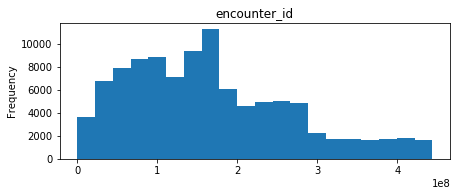




COLUMN: "patient_nbr"
MAX:  189502619
MIN:  135
NaN:  0


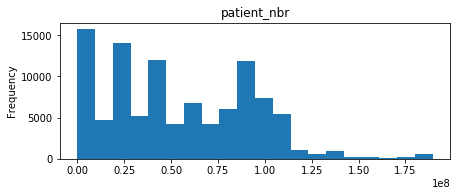




COLUMN: "admission_type_id"
MAX:  8
MIN:  1
NaN:  0


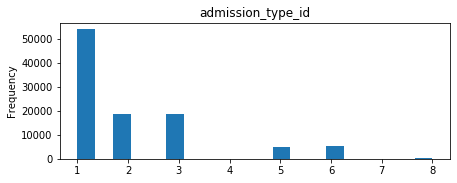




COLUMN: "discharge_disposition_id"
MAX:  28
MIN:  1
NaN:  0


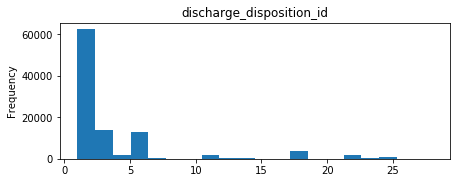




COLUMN: "admission_source_id"
MAX:  25
MIN:  1
NaN:  0


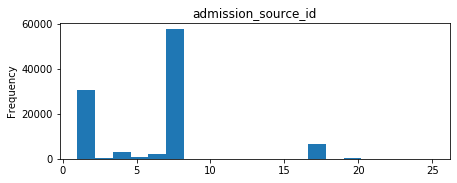




COLUMN: "time_in_hospital"
MAX:  14
MIN:  1
NaN:  0


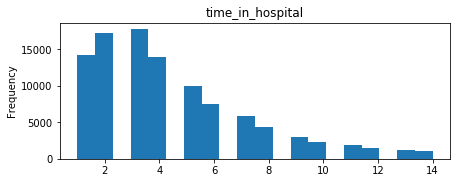




COLUMN: "num_lab_procedures"
MAX:  132
MIN:  1
NaN:  0


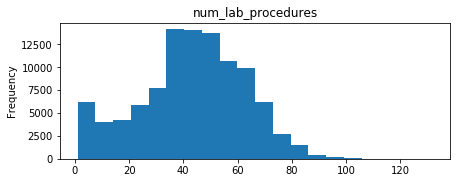




COLUMN: "num_procedures"
MAX:  6
MIN:  0
NaN:  0


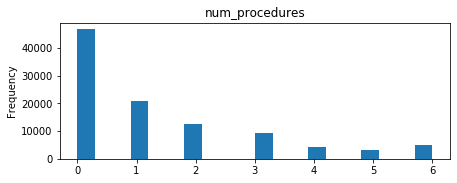




COLUMN: "num_medications"
MAX:  81
MIN:  1
NaN:  0


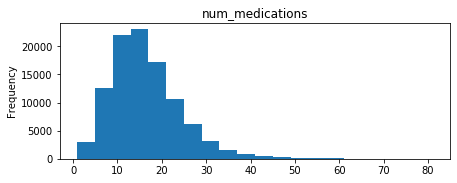




COLUMN: "number_outpatient"
MAX:  42
MIN:  0
NaN:  0


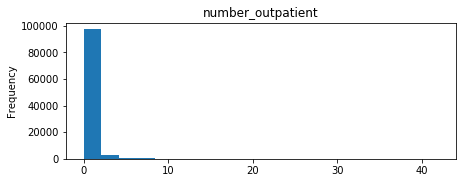




COLUMN: "number_emergency"
MAX:  76
MIN:  0
NaN:  0


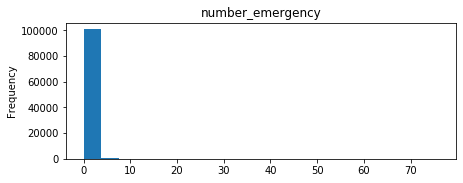




COLUMN: "number_inpatient"
MAX:  21
MIN:  0
NaN:  0


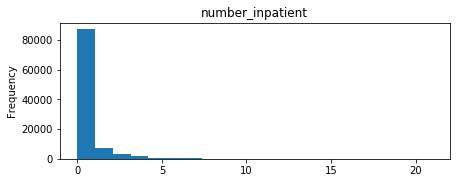




COLUMN: "number_diagnoses"
MAX:  16
MIN:  1
NaN:  0


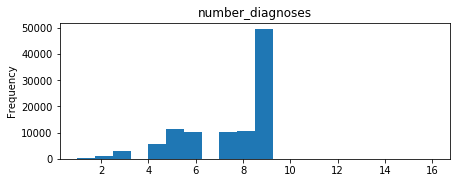




COLUMN: "readmitted"
MAX:  NO
MIN:  <30
NaN:  0


TypeError: no numeric data to plot

In [21]:
print_histograms(myDF)

In [22]:
#admission_type_id
myDF.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'readmitted'],
      dtype='object')

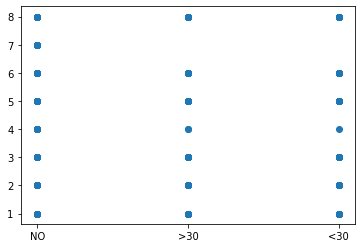

In [23]:
plt.scatter(myDF['readmitted'], myDF['admission_type_id'])
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
def category_to_num(df, columns):
    '''
    Convert all specified columns in dataframe to numerical 
    category.  Returns category DF
    '''
    df_c_num = df.copy()
    all_le = {}
    if not columns:
        columns = df.columns
    for c in columns:
        print(c)
        #df_c_num[c] = df_c_num[c].fillna('NaN')
        df_c_num[c] = df_c_num[c].astype('category')
        le = LabelEncoder()  # label encoder
        all_le[c] = le
        df_c_num[c] = le.fit_transform(df_c_num[c])
    return df_c_num, all_le

myDF_n, all_le = category_to_num(myDF, ['readmitted'])

readmitted


In [25]:
myDF_n['readmitted'].corr(myDF_n['admission_type_id'])

0.00895014274350305

In [26]:
myDF_n['admission_type_id'].corr(myDF_n['readmitted'])

0.008950142743503052

In [27]:
counts = pd.DataFrame()

In [28]:
counts['readmit_and_admission_id'] = myDF['admission_type_id'].astype('str') + myDF['readmitted']

In [29]:
counts

,readmit_and_admission_id
0,6NO
1,1>30
2,1NO
3,1NO
4,1NO
...,...
101761,1>30
101762,1NO
101763,1NO
101764,2NO


In [30]:
c = counts['readmit_and_admission_id'].value_counts()

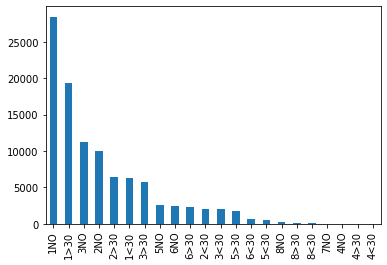

In [31]:
c.plot.bar()

In [32]:
c

1NO     28460
1>30    19309
3NO     11162
2NO      9962
2>30     6452
1<30     6221
3>30     5746
5NO      2569
6NO      2474
6>30     2231
2<30     2066
3<30     1961
5>30     1721
6<30      586
5<30      495
8NO       209
8>30       84
8<30       27
7NO        21
4NO         7
4>30        2
4<30        1
Name: readmit_and_admission_id, dtype: int64

In [33]:
counts['readmit_and_discharge_disposition_id'] = myDF['discharge_disposition_id'].astype('str') + myDF['readmitted']

In [34]:
counts

,readmit_and_admission_id,readmit_and_discharge_disposition_id
0,6NO,25NO
1,1>30,1>30
2,1NO,1NO
3,1NO,1NO
4,1NO,1NO
...,...,...
101761,1>30,3>30
101762,1NO,4NO
101763,1NO,1NO
101764,2NO,3NO


In [35]:
c = counts['readmit_and_discharge_disposition_id'].value_counts()

Text(0, 0.5, 'Log(count)')

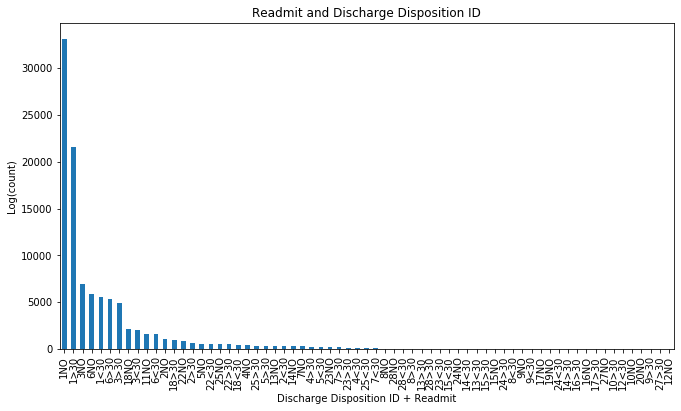

In [37]:
ax = c.plot.bar(figsize=(11,6), 
           #title='Readmit and Discharge Disposition ID'
           )
ax.set_title('Readmit and Discharge Disposition ID')
ax.set_xlabel('Discharge Disposition ID + Readmit')
ax.set_ylabel('Log(count)')

In [38]:
c

1NO      33115
1>30     21517
3NO       6992
6NO       5902
1<30      5602
         ...  
10NO         2
20NO         2
9>30         2
27>30        1
12NO         1
Name: readmit_and_discharge_disposition_id, Length: 67, dtype: int64

In [39]:
counts['readmit_and_admission_source_id'] = myDF['admission_source_id'].astype('str') + myDF['readmitted']

In [40]:
counts

,readmit_and_admission_id,readmit_and_discharge_disposition_id,readmit_and_admission_source_id
0,6NO,25NO,1NO
1,1>30,1>30,7>30
2,1NO,1NO,7NO
3,1NO,1NO,7NO
4,1NO,1NO,7NO
...,...,...,...
101761,1>30,3>30,7>30
101762,1NO,4NO,5NO
101763,1NO,1NO,7NO
101764,2NO,3NO,7NO


In [41]:
c = counts['readmit_and_admission_source_id'].value_counts()

Text(0, 0.5, 'Log(count)')

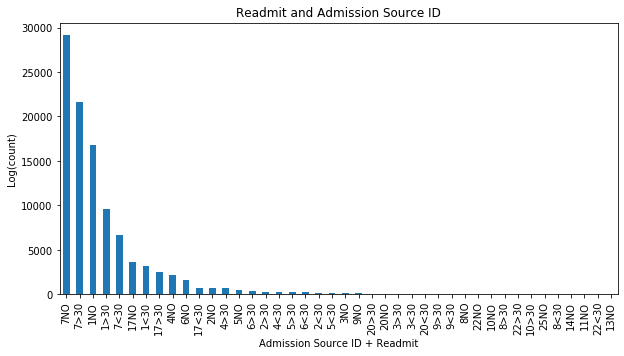

In [42]:
ax = c.plot.bar(figsize=(10,5),
           #title='Readmit and Admission Source ID'
           )
ax.set_title('Readmit and Admission Source ID')
ax.set_xlabel('Admission Source ID + Readmit')
ax.set_ylabel('Log(count)')
#pd.DataFrame.plot
#plt.plot

In [43]:
c

7NO      29107
7>30     21667
1NO      16795
1>30      9640
7<30      6720
17NO      3617
1<30      3130
17>30     2458
4NO       2206
6NO       1654
17<30      706
2NO        683
4>30       672
5NO        518
6>30       398
2>30       310
4<30       309
5>30       236
6<30       212
2<30       111
5<30       101
3NO        100
9NO         96
20>30       81
20NO        58
3>30        58
3<30        29
20<30       22
9>30        16
9<30        13
8NO         10
22NO         7
10NO         6
8>30         4
22>30        3
10>30        2
25NO         2
8<30         2
14NO         2
11NO         2
22<30        2
13NO         1
Name: readmit_and_admission_source_id, dtype: int64

In [45]:
import matplotlib.pyplot as plt